In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop(predictive_label, axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test
    
def model_report_performance(X, y):
    # define the model
    model = ExtraTreesClassifier()
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
   
    # report performance
    # print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

    return 'Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))
    
def get_confusion_matrix(y_test, y_pred, classifier):
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    color = 'white'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

In [3]:
synthetic_multiple_label_data = pd.read_csv("data\synthetic_multiple_label_data.csv")

y_labels = synthetic_multiple_label_data.iloc[:, 7:].copy()
load_data = synthetic_multiple_label_data.iloc[:, :7].copy()

labels_name = list(y_labels.columns)

In [21]:
models = {}
predicts = {}
classification = {}
models_performance = {}
data_test = {}

for label_idx in range(y_labels.shape[1]):
    label_name = labels_name[label_idx]

    x_column = label_name.replace("_class", "")

    data = load_data[['pressure', x_column]].copy() if x_column != 'conformity' else load_data.copy()
    

    data[label_name] = y_labels.iloc[:, label_idx]
    
    X_train, X_test, y_train, y_test = split_train_data(data, label_name, apply_smote = True)
    data_test[label_name] = y_test

    models_performance[label_name] = model_report_performance(X_train, y_train)
    
    # Crie e treine um modelo de classificação binária
    classifier = ExtraTreesClassifier()
    classifier.fit(X_train.values, y_train.values)
    
    # Armazene o modelo treinado
    model = classifier

    y_pred = model.predict(X_test)
    models[label_name] = model

    classification[label_name] = classification_report(y_test, y_pred)
    predicts[label_name] = y_pred

C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karol\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but ExtraTreesClassifier was fitted w

In [22]:
models_performance

{'iron_class': 'Accuracy: 0.979 (0.018)',
 'copper_class': 'Accuracy: 0.983 (0.021)',
 'hardness_class': 'Accuracy: 0.982 (0.015)',
 'silica_class': 'Accuracy: 0.965 (0.026)',
 'alkalinity_class': 'Accuracy: 0.980 (0.023)',
 'conductance_class': 'Accuracy: 0.973 (0.031)',
 'conformity_class': 'Accuracy: 0.952 (0.032)'}

In [23]:
models

{'iron_class': ExtraTreesClassifier(),
 'copper_class': ExtraTreesClassifier(),
 'hardness_class': ExtraTreesClassifier(),
 'silica_class': ExtraTreesClassifier(),
 'alkalinity_class': ExtraTreesClassifier(),
 'conductance_class': ExtraTreesClassifier(),
 'conformity_class': ExtraTreesClassifier()}

In [24]:
def get_statistc_result(predictive_label):
    y_test = data_test[predictive_label]
    y_pred = predicts[predictive_label]
    classifier = models[predictive_label]
    get_confusion_matrix(y_test, y_pred, classifier)
    print(classification[predictive_label])

Label = iron_class


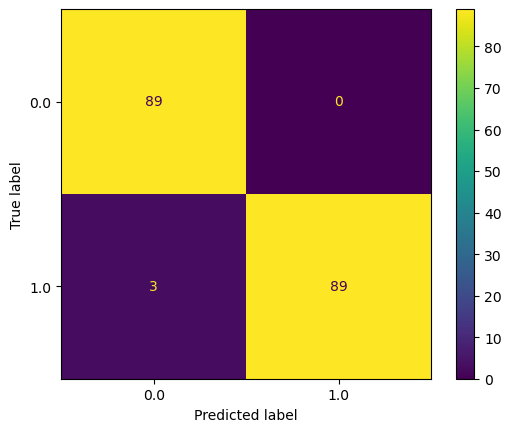

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        89
         1.0       1.00      0.97      0.98        92

    accuracy                           0.98       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.98      0.98      0.98       181

Label = copper_class


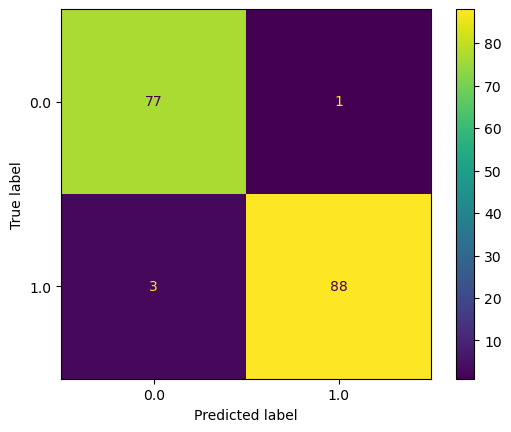

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        78
         1.0       0.99      0.97      0.98        91

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169

Label = hardness_class


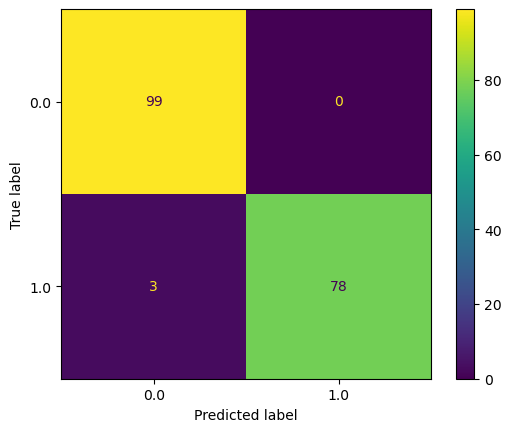

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        99
         1.0       1.00      0.96      0.98        81

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

Label = silica_class


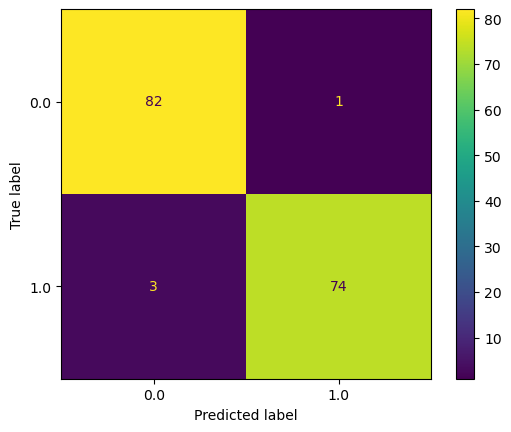

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98        83
         1.0       0.99      0.96      0.97        77

    accuracy                           0.97       160
   macro avg       0.98      0.97      0.97       160
weighted avg       0.98      0.97      0.97       160

Label = alkalinity_class


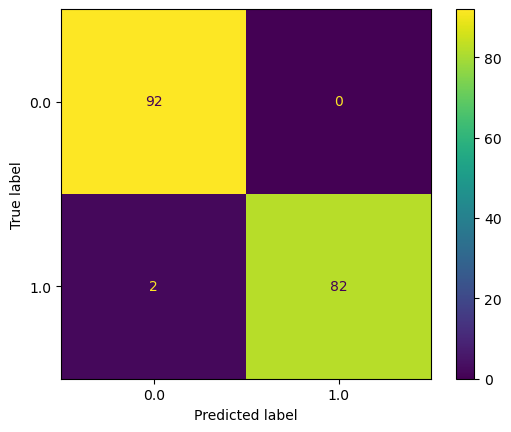

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        92
         1.0       1.00      0.98      0.99        84

    accuracy                           0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176

Label = conductance_class


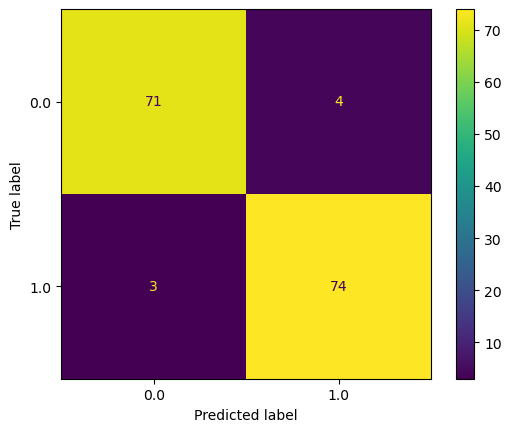

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        75
         1.0       0.95      0.96      0.95        77

    accuracy                           0.95       152
   macro avg       0.95      0.95      0.95       152
weighted avg       0.95      0.95      0.95       152

Label = conformity_class


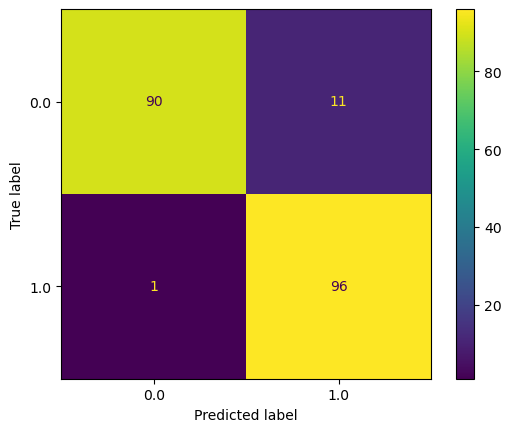

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       101
         1.0       0.90      0.99      0.94        97

    accuracy                           0.94       198
   macro avg       0.94      0.94      0.94       198
weighted avg       0.94      0.94      0.94       198



In [26]:
for label in labels_name:
    print(f"Label = {label}")
    get_statistc_result(label)

In [33]:
for label in labels_name:
    print(f"{label} model saved")
    filename = f'models_multiple_labels\{label}_classifier.sav'
    pickle.dump(models[label], open(filename, 'wb'))    

iron_class model saved
copper_class model saved
hardness_class model saved
silica_class model saved
alkalinity_class model saved
conductance_class model saved
conformity_class model saved
